**ANALYSIS OF TARIFFS OF A OPERATOR IN ORDER TO IDENTIFY A TARIF THAT BRINGS MORE MONEY**

**Goal**: choose a tariff that brings more money - "Smart" or "Ultra" - to adjust the advertising budget

**Data**: A sample of 500 users including information on:
- geolocation of the user
- tariff plan
- number of calls
- number of messages
- internet traffic

for 2018

**Additional information**
- rounding seconds of conversation and Mb of Internet traffic always goes up
- Unused calls, SMS, Internet for the previous month are not transferred to the next month

## General information

In [1]:
import pandas as pd
import os
import numpy as np
import math
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy import stats as st

In [2]:
list_df = []
file_names = ['calls.csv', 'internet.csv', 'messages.csv', 'tariffs.csv', 'users.csv']
for file_name in file_names:
    path1 = os.path.join('datasets', file_name) 
    path2 = os.path.join('real_estate_data.csv')
    if os.path.exists(path1):
        df = pd.read_csv(path1)
        list_df.append(df)
        print(f'path "{path1}" is right')
    elif os.path.exists(path2):
        df = pd.read_csv(path2)
        list_df.append(df)
        print(f'path "{path2}" is right')
    else:
        print('File is not found')
    


path "datasets\calls.csv" is right
path "datasets\internet.csv" is right
path "datasets\messages.csv" is right
path "datasets\tariffs.csv" is right
path "datasets\users.csv" is right


In [3]:
calls = list_df[0]
internet = list_df[1]
messages = list_df[2]
tariffs = list_df[3]
users = list_df[4]

In [4]:
def observe_data(table):
    '''Giving common understanding of data in dataframe'''
    print ('Sample')
    display(table.sample())
    print('_'*100)
    print(f'Number of rows: {table.shape[0]} \nNumber of columns: {table.shape[1]}')
    print('_'*100)
    names_columns = table.columns
    print(f'Columns names: {names_columns}')
    print('_'*100)
    names_to_corrige = []
    for name_column in names_columns:
        if not name_column.islower() or ' ' in name_column:
            names_to_corrige.append(name_column)
    if len(names_to_corrige) == 0:
        print ('Columns names are correct')
    else:
        print(f'Columns names to change: {names_to_corrige}')
    print('_'*100)
    lost_values = table.isna().sum()
    missed_values = lost_values.to_frame(name='missed_values')
    missed_values['percent'] = round(table.isna().mean()*100, 0)
    print ('Missing values:')
    display(missed_values)
    print('_'*100)
    print('Data types:')
    print(table.dtypes)
    print('_'*100)
    print(f'Number of duplicates: {table.duplicated().sum()}', 
          f'percent of duplicates {round(table.duplicated().mean()*100, 0)} %')


In [5]:
for df in [calls, internet, messages, tariffs, users]:
    observe_data(df)

Sample


,id,call_date,duration,user_id
189669,1466_684,2018-05-21,14.34,1466


____________________________________________________________________________________________________
Number of rows: 202607 
Number of columns: 4
____________________________________________________________________________________________________
Columns names: Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')
____________________________________________________________________________________________________
Columns names are correct
____________________________________________________________________________________________________
Missing values:


,missed_values,percent
id,0,0.0
call_date,0,0.0
duration,0,0.0
user_id,0,0.0


____________________________________________________________________________________________________
Data types:
id            object
call_date     object
duration     float64
user_id        int64
dtype: object
____________________________________________________________________________________________________
Number of duplicates: 0 percent of duplicates 0.0 %
Sample


,Unnamed: 0,id,mb_used,session_date,user_id
5408,5408,1015_416,253.34,2018-08-14,1015


____________________________________________________________________________________________________
Number of rows: 149396 
Number of columns: 5
____________________________________________________________________________________________________
Columns names: Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')
____________________________________________________________________________________________________
Columns names to change: ['Unnamed: 0']
____________________________________________________________________________________________________
Missing values:


,missed_values,percent
Unnamed: 0,0,0.0
id,0,0.0
mb_used,0,0.0
session_date,0,0.0
user_id,0,0.0


____________________________________________________________________________________________________
Data types:
Unnamed: 0        int64
id               object
mb_used         float64
session_date     object
user_id           int64
dtype: object
____________________________________________________________________________________________________
Number of duplicates: 0 percent of duplicates 0.0 %
Sample


,id,message_date,user_id
88388,1369_313,2018-10-16,1369


____________________________________________________________________________________________________
Number of rows: 123036 
Number of columns: 3
____________________________________________________________________________________________________
Columns names: Index(['id', 'message_date', 'user_id'], dtype='object')
____________________________________________________________________________________________________
Columns names are correct
____________________________________________________________________________________________________
Missing values:


,missed_values,percent
id,0,0.0
message_date,0,0.0
user_id,0,0.0


____________________________________________________________________________________________________
Data types:
id              object
message_date    object
user_id          int64
dtype: object
____________________________________________________________________________________________________
Number of duplicates: 0 percent of duplicates 0.0 %
Sample


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
1,1000,30720,3000,1950,150,1,1,ultra


____________________________________________________________________________________________________
Number of rows: 2 
Number of columns: 8
____________________________________________________________________________________________________
Columns names: Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')
____________________________________________________________________________________________________
Columns names are correct
____________________________________________________________________________________________________
Missing values:


,missed_values,percent
messages_included,0,0.0
mb_per_month_included,0,0.0
minutes_included,0,0.0
rub_monthly_fee,0,0.0
rub_per_gb,0,0.0
rub_per_message,0,0.0
rub_per_minute,0,0.0
tariff_name,0,0.0


____________________________________________________________________________________________________
Data types:
messages_included         int64
mb_per_month_included     int64
minutes_included          int64
rub_monthly_fee           int64
rub_per_gb                int64
rub_per_message           int64
rub_per_minute            int64
tariff_name              object
dtype: object
____________________________________________________________________________________________________
Number of duplicates: 0 percent of duplicates 0.0 %
Sample


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
80,1080,28,NaN,Москва,Всеволод,Игнатьев,2018-08-12,ultra


____________________________________________________________________________________________________
Number of rows: 500 
Number of columns: 8
____________________________________________________________________________________________________
Columns names: Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')
____________________________________________________________________________________________________
Columns names are correct
____________________________________________________________________________________________________
Missing values:


,missed_values,percent
user_id,0,0.0
age,0,0.0
churn_date,462,92.0
city,0,0.0
first_name,0,0.0
last_name,0,0.0
reg_date,0,0.0
tariff,0,0.0


____________________________________________________________________________________________________
Data types:
user_id        int64
age            int64
churn_date    object
city          object
first_name    object
last_name     object
reg_date      object
tariff        object
dtype: object
____________________________________________________________________________________________________
Number of duplicates: 0 percent of duplicates 0.0 %


**Conclusion**
- no duplicates were found for all data, column names are written correctly
- there are missing values only in the churn_date column of the users table and this indicates that the user continues to use the selected tariff - this is 92% of the entire sample
- in the internet table, you need to delete the "Unnamed: 0" column, which duplicates the row indexes
- for all tables it is necessary to cast columns with dates to the datetime type: call_date, session_date, message_date, churn_date, reg_date

## Data preprocessing

### Таблица users

In [6]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [7]:
users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

In [8]:
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [9]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

In [11]:
users['reg_date'].describe()

count                     500
unique                    270
top       2018-05-28 00:00:00
freq                        8
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: reg_date, dtype: object

In [12]:
users['сhurn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

In [13]:
len(users.query('churn_date.notna()'))

38

In [14]:
users.dtypes

user_id                int64
age                    int64
churn_date            object
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
сhurn_date    datetime64[ns]
dtype: object

**Conclusion**
- the name of the cities is written correctly
- the return of clients does not have outliers
- about 70% of customers from the sample use the smart tariff and only 30% - ultra
- 38 customers stopped using the plan they originally chose
- no incorrect data found, reg_date and churn_date columns are converted to datetime type

### Table calls

#### Search for anomalies

In [15]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [16]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

According to the explanations, missed calls are indicated by zeros, so they do not need to be deleted.

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

In [18]:
calls['call_date'].describe()

count                  202607
unique                    365
top       2018-12-31 00:00:00
freq                     1435
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object

In [19]:
calls['user_id'].value_counts().reset_index().describe()

,index,user_id
count,492.000000,492.000000
mean,1249.050813,411.802846
std,144.325595,291.803375
min,1000.000000,14.000000
25%,1124.750000,180.000000
50%,1249.500000,344.500000
75%,1374.250000,589.500000
max,1499.000000,1760.000000


**Conclusion**
no anomalies were found in the data:
- duration of calls varies from 0 (missed) to 38 minutes (longest call)
- call dates are limited to 2018
- the minimum number of calls per year made by a subscriber is 14, the maximum is 1760 (approximately 5 calls per day)
- call_date column cast to datetime type

#### Number of calls made and spent minutes of conversation by month for each user

In [20]:
calls['month'] = calls['call_date'].dt.month

Since the clarification says that the company rounds each call up to minutes, we will correct the data in the duration column

In [21]:
#calls['duration'] = calls['duration'].apply(lambda x: math.ceil(x))
calls['duration'] = np.ceil(calls['duration'])

In [22]:
users_calls_by_month = calls.groupby(['month', 'user_id']).agg({'duration':'sum', 'id':'count'}).reset_index()

In [23]:
users_calls_by_month.columns = ['month', 'user_id', 'duration', 'calls_number']

In [24]:
users_calls_by_month.head()

,month,user_id,duration,calls_number
0,1,1005,95.0,15
1,1,1032,380.0,61
2,1,1045,9.0,1
3,1,1055,551.0,64
4,1,1071,194.0,24


**Conclusion** we calculated the number of calls and their total duration for each client in each month

### Table messages

#### Search of errors

In [25]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [26]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

In [27]:
messages['message_date'].describe()

count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object

In [28]:
messages['user_id'].value_counts().reset_index().describe()

,index,user_id
count,426.000000,426.000000
mean,1252.396714,288.816901
std,145.893240,267.607552
min,1000.000000,1.000000
25%,1125.250000,85.750000
50%,1257.500000,215.500000
75%,1380.750000,414.000000
max,1499.000000,1463.000000


**Conclusion**
no anomalies found in the data:
- dates for sending messages are limited to 2018
- on average users send less than 1 message per day, the user who sent the most messages sends approximately 4 messages per day
- message_date column cast to datetime type

#### Number of sent messages by month

In [29]:
messages['month'] = messages['message_date'].dt.month

In [30]:
users_messages_by_month = messages.groupby(['month', 'user_id'])['id'].count().reset_index()

In [31]:
users_messages_by_month.columns = ['month', 'user_id', 'messages_number']

In [32]:
users_messages_by_month.head()

,month,user_id,messages_number
0,1,1005,7
1,1,1032,38
2,1,1045,5
3,1,1055,30
4,1,1071,16


**Conclusion** we counted the number of messages for each client in each month

### Table internet

#### Search for incorrect data

In [33]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Remove the column that duplicates the indexes of the records as completely uninformative

In [34]:
internet = internet.drop('Unnamed: 0', axis = 1)

In [35]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [36]:
internet['session_date'].describe()

count                  149396
unique                    365
top       2018-12-31 00:00:00
freq                     1057
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: session_date, dtype: object

In [37]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

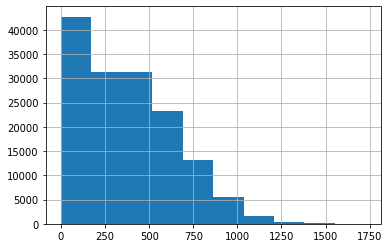

In [38]:
internet['mb_used'].hist();

**Conclusion**
no anomalies found in the data:
- dates of using Internet traffic are limited to 2018
- on average, users use 350 MB of traffic per session, although there are also very heavy sessions - over 1 GB of traffic spent - it will be considered that someone watched a video in HD, in a very high and good quality format
- removed column Unnamed: 0 as uninformative
- session_date column cast to datetime type

#### Internet traffic consumed by months

In [39]:
internet['month'] = internet['session_date'].dt.month

In [40]:
users_internet_by_month = internet.groupby(['month', 'user_id'])['mb_used'].sum().reset_index()

In [41]:
users_internet_by_month.head()

,month,user_id,mb_used
0,1,1005,2727.97
1,1,1032,24127.69
2,1,1045,2346.71
3,1,1055,17090.88
4,1,1071,15604.34


Since it says that the amount of MB is rounded up to GB at the end of the month, we will correct the mb_used column

In [42]:
#users_internet_by_month['mb_used'] = users_internet_by_month['mb_used'].apply(lambda x: math.ceil(x/1024))
users_internet_by_month['mb_used'] = np.ceil(users_internet_by_month['mb_used']/1024)

In [43]:
users_internet_by_month = users_internet_by_month.rename(columns= {'mb_used':'gb_used'})

In [44]:
users_internet_by_month.head()

,month,user_id,gb_used
0,1,1005,3.0
1,1,1032,24.0
2,1,1045,3.0
3,1,1055,17.0
4,1,1071,16.0


**Conclusion** we calculated the total use of Internet traffic for each client in each month

## Monthly revenue per user

In [45]:
revenues = (users_calls_by_month.merge(users_messages_by_month, how = 'outer', on = ['month', 'user_id'])
            .merge(users_internet_by_month, how = 'outer', on = ['month', 'user_id'])
            .merge(users[['user_id', 'tariff', 'city']], on = 'user_id')
            .merge(tariffs, left_on = 'tariff', right_on = 'tariff_name'))

In [46]:
revenues.head()

,month,user_id,duration,calls_number,messages_number,gb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1,1005,95.0,15.0,7.0,3.0,smart,Набережные Челны,50,15360,500,550,200,3,3,smart
1,2,1005,456.0,69.0,38.0,8.0,smart,Набережные Челны,50,15360,500,550,200,3,3,smart
2,3,1005,606.0,77.0,56.0,11.0,smart,Набережные Челны,50,15360,500,550,200,3,3,smart
3,4,1005,712.0,101.0,41.0,10.0,smart,Набережные Челны,50,15360,500,550,200,3,3,smart
4,5,1005,595.0,73.0,42.0,8.0,smart,Набережные Челны,50,15360,500,550,200,3,3,smart


Let's calculate the volume of Internet traffic in GB

In [47]:
revenues['mb_per_month_included'] = revenues['mb_per_month_included']/1024

Let's calculate the number of minutes of calls, messages and Internet traffic spent over the tariff for each client - if the difference between the real value and the value according to the tariff is negative - the client did not use extra resources - their value = 0

In [48]:
revenues['extra_minutes'] = revenues['duration'] - revenues['minutes_included']
revenues['extra_minutes'] = revenues['extra_minutes'].apply(lambda x: x if x > 0 else 0)

In [49]:
revenues['extra_messages'] = revenues['messages_number'] - revenues['messages_included']
revenues['extra_messages'] = revenues['extra_messages'].apply(lambda x: x if x > 0 else 0)

In [50]:
revenues['extra_internet'] = revenues['gb_used'] - revenues['mb_per_month_included']
revenues['extra_internet'] = revenues['extra_internet'].apply(lambda x: x if x > 0 else 0)

In [51]:
revenues['revenue'] = (revenues['rub_monthly_fee'] 
                       + revenues['extra_minutes']*revenues['rub_per_minute'] 
                       + revenues['extra_messages']*revenues['rub_per_message'] 
                       + revenues['extra_internet']*revenues['rub_per_gb'])

In [52]:
revenues.head()

,month,user_id,duration,calls_number,messages_number,gb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,extra_minutes,extra_messages,extra_internet,revenue
0,1,1005,95.0,15.0,7.0,3.0,smart,Набережные Челны,50,15.0,500,550,200,3,3,smart,0.0,0.0,0.0,550.0
1,2,1005,456.0,69.0,38.0,8.0,smart,Набережные Челны,50,15.0,500,550,200,3,3,smart,0.0,0.0,0.0,550.0
2,3,1005,606.0,77.0,56.0,11.0,smart,Набережные Челны,50,15.0,500,550,200,3,3,smart,106.0,6.0,0.0,886.0
3,4,1005,712.0,101.0,41.0,10.0,smart,Набережные Челны,50,15.0,500,550,200,3,3,smart,212.0,0.0,0.0,1186.0
4,5,1005,595.0,73.0,42.0,8.0,smart,Набережные Челны,50,15.0,500,550,200,3,3,smart,95.0,0.0,0.0,835.0


**Conclusion**
We calculated the income that the company receives from each client per month, depending on its tariff plan and the use of extra resources

## Analysis of the behavior of the operator's clients

### Average number of minutes of calls, messages and traffic for users of different tariffs

In [53]:
mean_resources = revenues.groupby(['tariff'])[['duration', 'messages_number', 'gb_used']].mean()

In [54]:
mean_resources

,duration,messages_number,gb_used
tariff,,,
smart,419.062978,38.716441,16.336176
ultra,545.451104,61.161006,19.694359


### Standard deviation 

In [55]:
std_resources = revenues.groupby(['tariff'])[['duration', 'messages_number', 'gb_used']].std()

In [56]:
std_resources

,duration,messages_number,gb_used
tariff,,,
smart,189.325618,26.787949,5.737923
ultra,306.925754,45.931026,9.702924


### Variance

In [57]:
variance = std_resources*std_resources
variance

,duration,messages_number,gb_used
tariff,,,
smart,35844.189551,717.594201,32.923756
ultra,94203.418396,2109.659183,94.146734


### Frequency density histograms of a continuous variable

In [58]:
def draw_hist(column):
    sns.distplot(revenues.loc[revenues[column].notna(), : ].query('tariff == "smart"')[column])
    sns.distplot(revenues.loc[revenues[column].notna(), : ].query('tariff == "ultra"')[column])
    plt.legend(['Smart', 'Ultra'])
    plt.title(f'Distribution {column}')

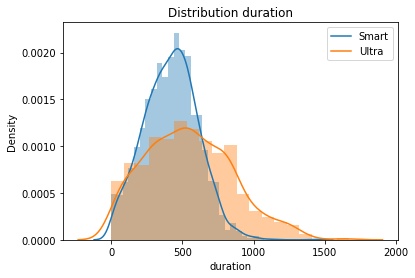

In [59]:
draw_hist('duration')

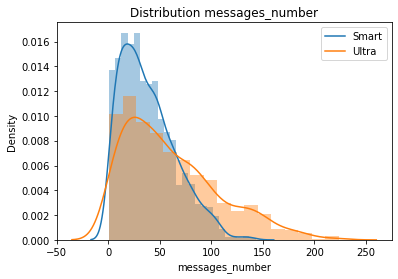

In [60]:
draw_hist('messages_number')

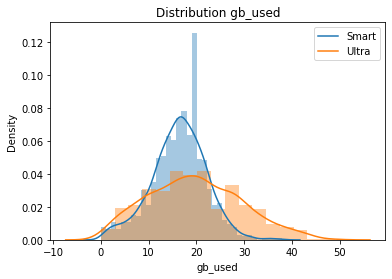

In [61]:
draw_hist('gb_used')

**Conclusion**:
- users of the Ultra tariff on average use more resources - their calls are longer, the number of messages and consumption of Internet traffic is greater than that of Smart tariff users. The Ultra tariff is used by users who consume more resources, which is why they choose this tariff, which includes more minutes of conversation, messages and Internet traffic than Smart
- standard deviations for the duration of calls, the number of messages and Internet traffic of Ultra clients are higher than those of Smart clients - the intervals of resources used are wider - users consume resources in different amounts. The behavior of Ultra tariff users is less uniform
- Smart users mostly use up to 700 minutes per month, Ultra - up to 900. Both distributions are slightly skewed to the right, that is, for both tariffs there are users who are very fond of telephone conversations
- Smart clients very often send up to 100 messages per month, the distribution for them is also skewed to the right - there are clients that send a lot of messages. For the Ultra tariff, the corresponding indicator is up to 150 messages per month
- for Internet traffic - Smart customers consume more often 10-25 GB of Internet traffic - that is, the Internet traffic included in the tariff (15 GB) is clearly not enough for them and they pay extra for each additional GB. Ultra customers consume in their majority from 5 to 35 GBh in the price, they most often have enough 30 GB included in the plan. For both tariffs, distributions are practically not skewed

## Testing hypotheses

### Hypothesis 1 - the average revenue of users of the Ultra and Smart tariffs are different

The following statement is accepted as the null hypothesis:

H0 = average revenue of Smart users equals average revenue of Ultra customers

As an alternative hypothesis:

H1 = average revenues of Smart and Ultra users are not equal

Let us calculate the probability of obtaining the mean observed on the sample, provided that the null hypothesis is true. If the probability is large, we cannot reject H0.
Set the critical level of statistical significance alpha = 0.01
We use the method to test the hypothesis about the equality of the mean of two general populations based on samples taken from them - ttest

In [62]:
smart = revenues.query('tariff == "smart"')['revenue']

In [63]:
ultra = revenues.query('tariff == "ultra"')['revenue']

In [64]:
alpha =0.01 

results = st.ttest_ind(
    smart, 
    ultra, 
    equal_var = False ) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Rejecting H0")
else:
    print("Failed to reject H0") 

p-значение: 4.2606313931076085e-250
Rejecting H0


In [65]:
smart.mean()>ultra.mean()

False

**Conclusion** The average revenue of Ultra tariff users differs from the average revenue of Smart tariff users - the average revenue of Ultra clients is higher than the average revenue of Smart clients.

### Hypothesis 2 - the average revenue of users from Moscow differs from the revenue of users from other regions

The following statement is accepted as the null hypothesis:

H0 = the average revenue of users in Moscow is equal to the average revenue of customers in other cities

As an alternative hypothesis:

H1 = average revenues of users from Moscow and other cities are not equal

Let us calculate the probability of obtaining the mean observed on the sample, provided that the null hypothesis is true. If the probability is large, we cannot reject H0.
Set the critical level of statistical significance alpha = 0.01
We use the method to test the hypothesis about the equality of the mean of two general populations based on samples taken from them - ttest

In [66]:
moscow_clients_revenue = revenues.query('city == "Москва"')['revenue']

In [67]:
other_clients_revenue = revenues.query('city != "Москва"')['revenue']

In [68]:
alpha =0.01 

results = st.ttest_ind(
    moscow_clients_revenue, 
    other_clients_revenue, 
    equal_var = False ) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Rejecting H0")
else:
    print("Failed to reject H0") 

p-значение: 0.5257376663729298
Failed to reject H0


**Conclusion** We cannot be sure that the average revenue of customers in Moscow is not equal to the average revenue of customers in the regions

## Conclusion

We need to attract users to use the Ultra tariff - it has been proven that the average revenue from clients of this tariff is different from the average revenue of Smart tariff clients and it is higher. Ultra customers bring more money to the company

At the same time, there is no evidence that customers from Moscow bring in more money than customers from the regions - a campaign to attract customers to use the Ultra tariff should be carried out not only in the capital, but also in the regions

Taking into account the fact that the Ultra tariff is used by customers with a higher consumption of resources (call duration, number of messages and Internet traffic) than Smart customers, the target category of potential customers is people involved in constant communication through calls and messages and actively using mobile Internet